In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
import matplotlib.gridspec as gridspec
from matplotlib.animation import FuncAnimation, writers, PillowWriter
from copy import copy
from datetime import timedelta

In [3]:
datadir = '/scratch/rfischer/Kooi_data/data_output/'
regions = {'EqPac': 'Equatorial Pacific',
           'GPGP': 'Great Pacific Garbage Patch',
           'SO': 'Southern Ocean',
           'NPSG': 'North Pacific Subtropical Gyre'}

In [4]:
r_pl_clist = ['#7a0177','#c51b8a','#f768a1', '#fbb4b9']
r_pl_cmap = plt.get_cmap('RdPu_r')

In [5]:
region = 'EqPac'
mortality = 0.39              # [d-1]
runtime = 170                  # [days]
dt = 60                       # [seconds]
outputdt = 12                 # [hours]
death = 'NEMO_detritus'
mixing = 'markov_0_KPP_reflect'+death+'_tidal'
rho_p = 920
sizebinedges = [1e-3, 1e-4, 1e-5]
res = '1x1'
proc = 'bfnoadv'

In [6]:
# ds = xr.open_dataset(datadir+'regional_'+region+'_bfadv_Jan_2004_0'+str(mortality)[2:]+'mort_'+mixing+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
ds = xr.open_dataset(datadir+'regional_'+region+'_'+proc+'_Jan_2004_'+res+'res_'+mixing+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')

In [7]:
number_of_trajectories_to_plot = 333
n_plt = number_of_trajectories_to_plot
f_plt = int(np.round(len(ds['traj'])/n_plt))
print('plotting '+str(n_plt)+' of '+str(len(ds['traj']))+' trajectories')
print('plotting every '+str(f_plt)+' particles')

plotting 333 of 10000 trajectories
plotting every 30 particles


In [8]:
mld = np.mean(np.divide(ds['z'],ds['mld']),axis=0)

/nethome/6492215/.conda/envs/py3_parcels/lib/python3.6/site-packages/xarray/core/computation.py:700: RuntimeWarning: divide by zero encountered in true_divide
  result_data = func(*input_data)


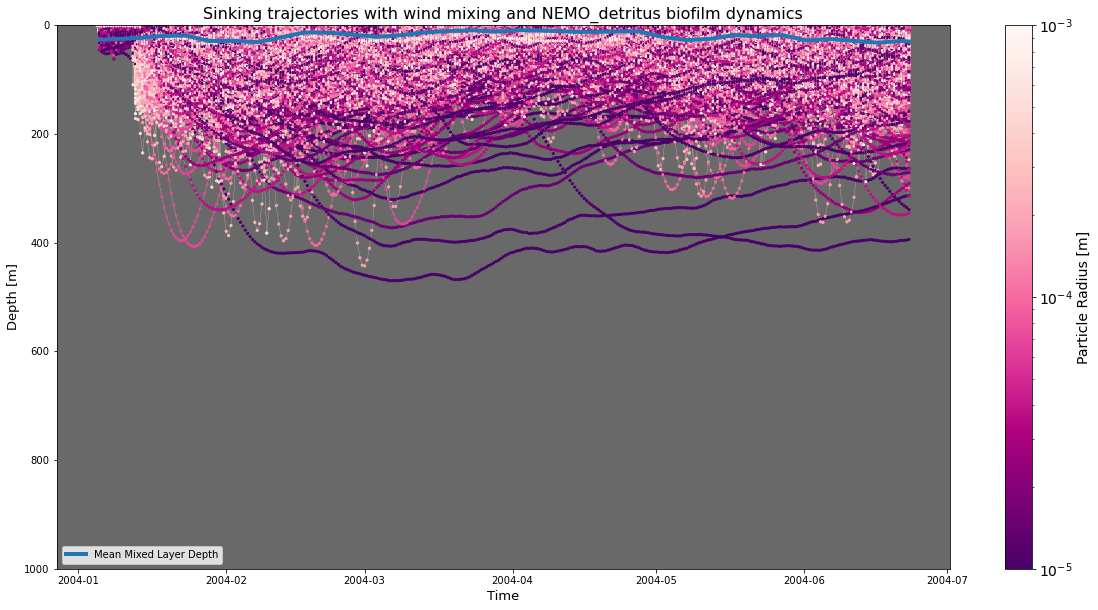

In [9]:
fig = plt.figure(figsize=(20,10))
ax1=plt.axes()

sc = ax1.scatter(ds['time'].T[:,::f_plt], ds['z'].T[:,::f_plt], s=5, c=np.tile(ds['r_pl'].T[::f_plt],[len(ds['obs']),1]),cmap=r_pl_cmap,norm=colors.LogNorm(vmin=ds['r_pl'].min(), vmax=ds['r_pl'].max()),zorder=2)
ln = ax1.plot(ds['time'].T[:,::f_plt], ds['z'].T[:,::f_plt], c='mistyrose',linewidth=0.2,zorder=1)
ax1.plot(ds['time'][0,:], mld, linewidth=4, label='Mean Mixed Layer Depth')
ax1.set_title('Sinking trajectories with wind mixing and '+death+' biofilm dynamics', fontsize=16)
ax1.set_ylabel('Depth [m]', fontsize=13)
ax1.set_xlabel('Time', fontsize=13)
ax1.set_facecolor('dimgray')
ax1.set_ylim(1000,0)

cb = fig.colorbar(sc, ax=ax1)
cb.set_label('Particle Radius [m]', fontsize=14)
cb.ax.tick_params(labelsize=14)
ax1.legend(loc = 'lower left')
plt.show()

In [10]:
radii = np.unique(ds['r_pl'])

In [11]:
split_ds = list(ds.groupby('r_pl'))

In [12]:
r_pl_cs = plt.get_cmap('RdPu_r', len(split_ds))

In [13]:
r_pl_list = r_pl_cs(np.linspace(0.,1.,len(split_ds)))

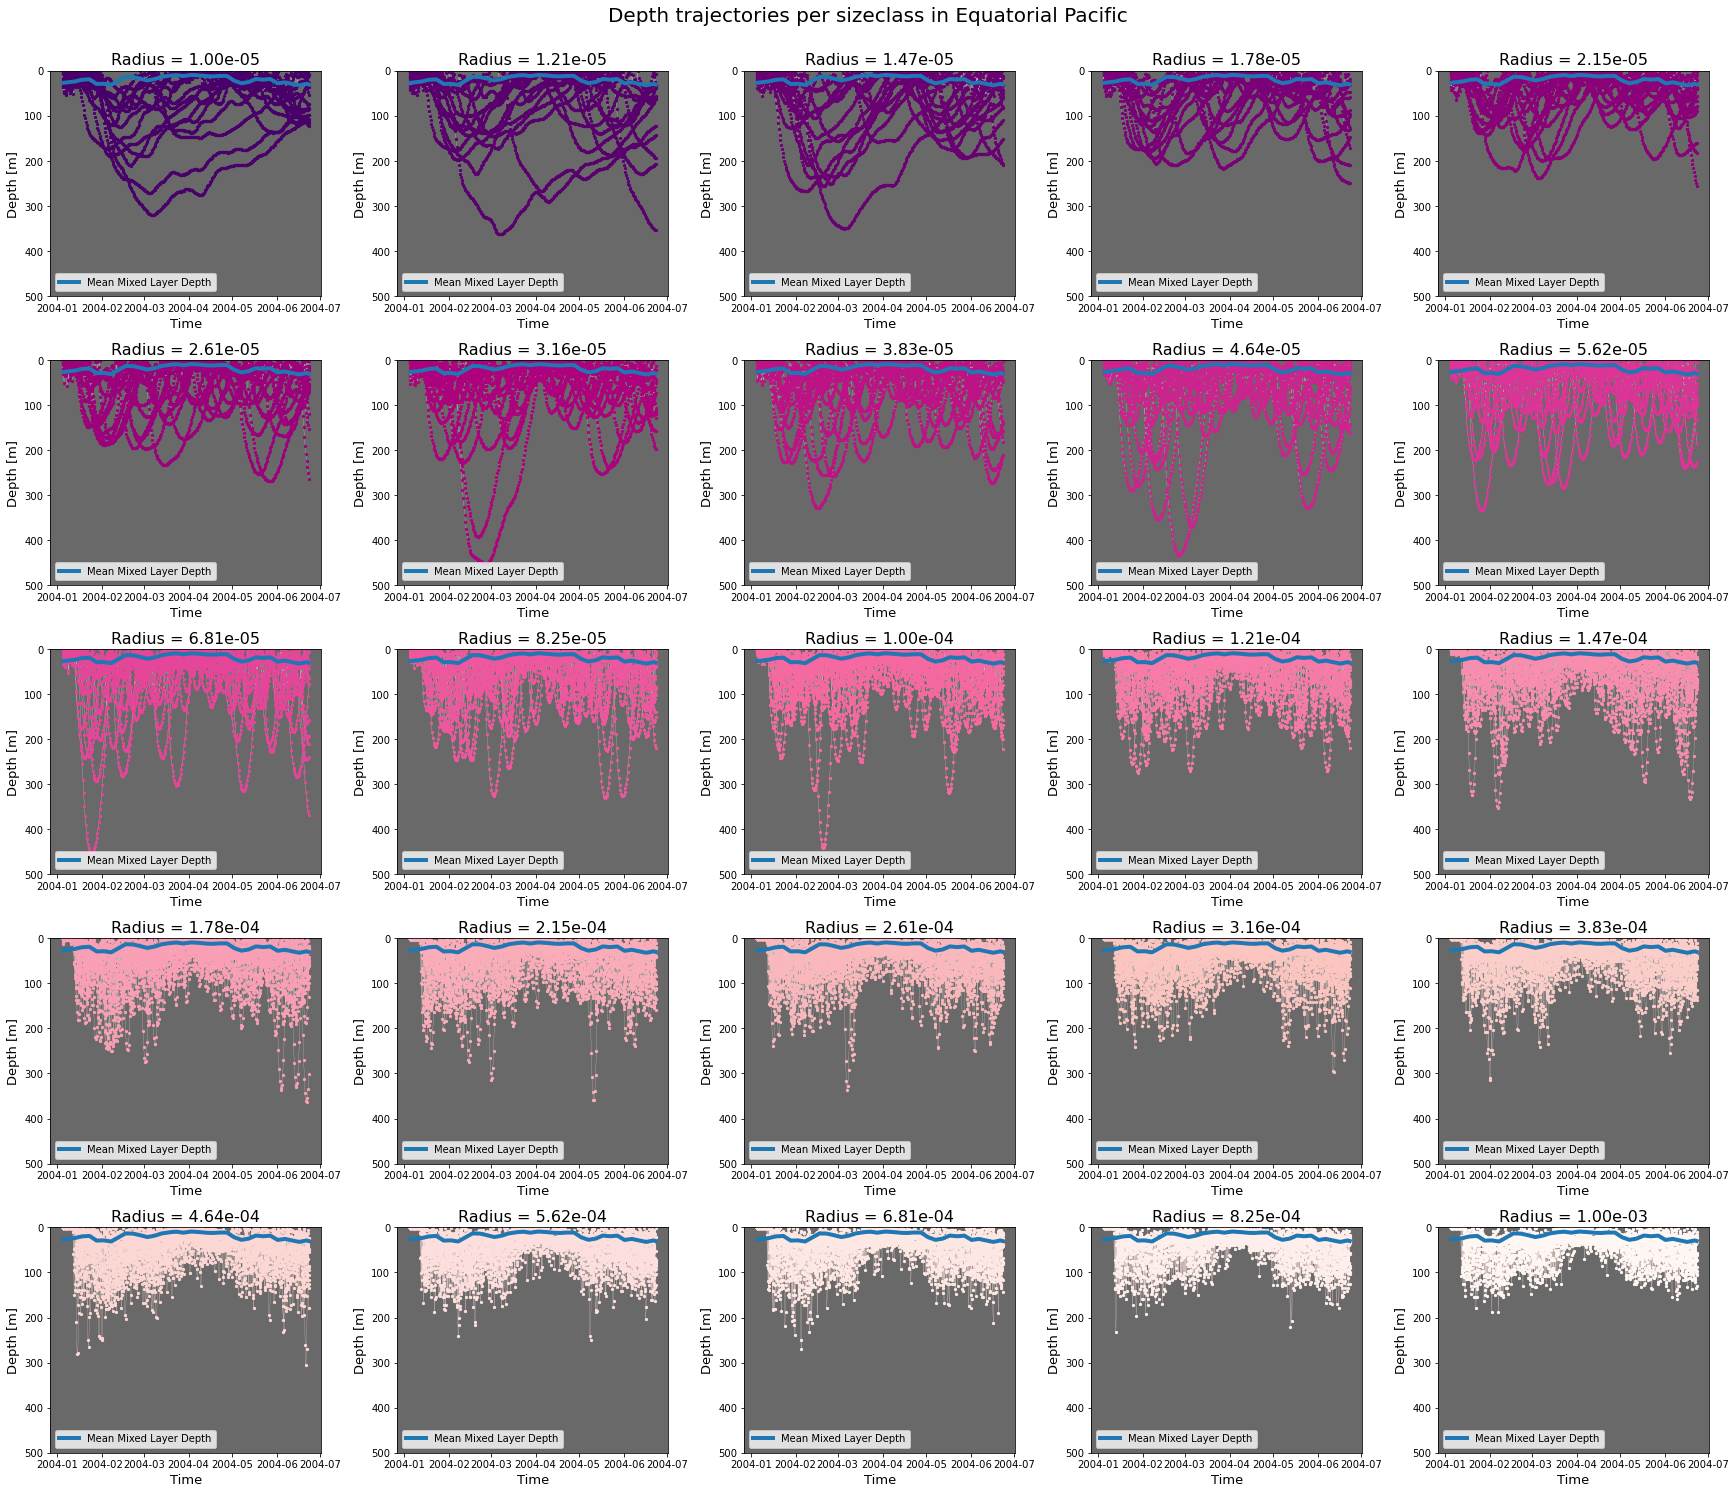

In [14]:
fig = plt.figure(figsize=(24,20), constrained_layout=True)
fig.suptitle('Depth trajectories per sizeclass in '+regions[region], fontsize=20, y=1.03)
gs = gridspec.GridSpec(ncols=5, nrows=5, figure=fig)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[0, 3])
ax4 = fig.add_subplot(gs[0, 4])
ax5 = fig.add_subplot(gs[1, 0])
ax6 = fig.add_subplot(gs[1, 1])
ax7 = fig.add_subplot(gs[1, 2])
ax8 = fig.add_subplot(gs[1, 3])
ax9 = fig.add_subplot(gs[1, 4])
ax10 = fig.add_subplot(gs[2, 0])
ax11 = fig.add_subplot(gs[2, 1])
ax12 = fig.add_subplot(gs[2, 2])
ax13 = fig.add_subplot(gs[2, 3])
ax14 = fig.add_subplot(gs[2, 4])
ax15 = fig.add_subplot(gs[3, 0])
ax16 = fig.add_subplot(gs[3, 1])
ax17 = fig.add_subplot(gs[3, 2])
ax18 = fig.add_subplot(gs[3, 3])
ax19 = fig.add_subplot(gs[3, 4])
ax20 = fig.add_subplot(gs[4, 0])
ax21 = fig.add_subplot(gs[4, 1])
ax22 = fig.add_subplot(gs[4, 2])
ax23 = fig.add_subplot(gs[4, 3])
ax24 = fig.add_subplot(gs[4, 4])
axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9,ax10, ax11, ax12, ax13, ax14,ax15, ax16, ax17, ax18, ax19,ax20, ax21, ax22, ax23, ax24]


for r, ax in enumerate(axes):
    sc = ax.scatter(split_ds[r][1]['time'].T[:,::f_plt], split_ds[r][1]['z'].T[:,::f_plt], s=5, color=r_pl_list[r],zorder=2)
    ln = ax.plot(split_ds[r][1]['time'].T[:,::f_plt], split_ds[r][1]['z'].T[:,::f_plt], color='mistyrose',linewidth=0.2,zorder=1)
    ax.plot(ds['time'][0,:], mld, linewidth=4, label='Mean Mixed Layer Depth')
    ax.set_title('Radius = '+"{:.2e}".format(radii[r]), fontsize=16)
    ax.set_ylabel('Depth [m]', fontsize=13)
    ax.set_xlabel('Time', fontsize=13)
    ax.set_facecolor('dimgray')
    ax.set_ylim(500,0)
    ax.legend(loc = 'lower left')

# cb = fig.colorbar(sc, ax=ax1)
# cb.set_label('Particle Radius [m]', fontsize=14)
# cb.ax.tick_params(labelsize=14)

plt.show()

In [15]:
r = 9

In [16]:
timeseries = split_ds[r][1]['z'].values.flatten()
mld = split_ds[r][1]['mld'].values.flatten()
mld_bool = mld > 1

In [17]:
timeseries[:100]

array([  0.6       ,  39.28796068,  18.35809671,   4.33459821,
        28.44771709,  42.71869835,  36.14911433,  49.78061738,
        38.82090621,  16.42920758,   3.62024986,   8.23959726,
        12.09468958,  36.62367416,  11.49408795,   7.20094395,
         1.14429825,   3.20927145,   8.98967188,   3.54511864,
        18.63460351,   9.4194282 ,   0.68005295,  11.41759837,
         7.64404493,  11.12601846,   6.02249349,   3.08483172,
        23.30569329,   6.21803351,  36.09777903,  51.78623108,
        65.23203961,  77.43071634,  88.24340762,  96.41250544,
       101.49471861, 104.6436316 , 105.83536946, 104.07837909,
       102.10843428,  98.08534832,  92.63632502,  86.17340248,
        78.15065843,  68.38299294,  57.8501067 ,  45.54715867,
        16.90106134,  23.6077975 ,  39.9030145 ,  33.52075913,
        39.34181228,  45.96188883,  23.47459312,  14.08700627,
        32.90159588,   0.66018   ,  60.85063304,  77.17284083,
        92.01019927, 104.33183676, 113.97434527, 121.14

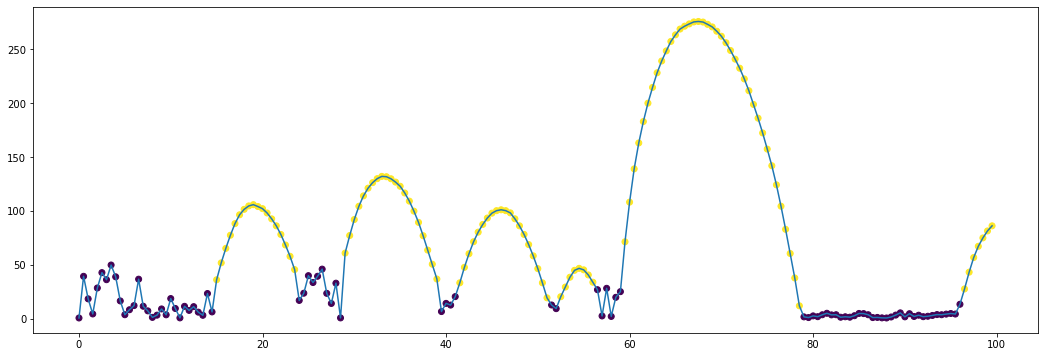

In [18]:
L_series = 200

fig = plt.figure(figsize=(18,6))

plt.plot(np.linspace(0,len(timeseries)/2,len(timeseries))[:L_series],timeseries[:L_series])
plt.scatter(np.linspace(0,len(timeseries)/2,len(timeseries))[:L_series],timeseries[:L_series],c=mld_bool[:L_series])

### Single oscillations

In [19]:
mld_bool[:L_series]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [20]:
import itertools

osc_ids = []
for k, g in itertools.groupby(enumerate(mld_bool), lambda x:x[1]):
    if k == True:
        ind,bool = list(zip(*g))
        if len(ind)>1:
            osc_ids.append(ind[0::len(ind)-1])

In [21]:
print('The number of oscillations of particles with radius '+"{:.2e}".format(radii[r])+' m = '+str(len(osc_ids)))

The number of oscillations of particles with radius 5.62e-05 m = 4953


In [22]:
print('The maximum length of an oscillation of particles with radius '+"{:.2e}".format(radii[r])+' m = '+str(np.diff(osc_ids).max())+' dt or '+str(np.round(np.diff(osc_ids).max()/(24/outputdt),1))+' days')
print('The mean length of an oscillation of particles with radius '+"{:.2e}".format(radii[r])+' m = '+str(np.round(np.diff(osc_ids).mean(),1))+' dt or '+str(np.round(np.diff(osc_ids).mean()/(24/outputdt),1))+' days')

The maximum length of an oscillation of particles with radius 5.62e-05 m = 321 dt or 160.5 days
The mean length of an oscillation of particles with radius 5.62e-05 m = 20.5 dt or 10.2 days


In [23]:
oscillations = np.ones((len(osc_ids),np.diff(osc_ids).max()))*-1

In [24]:
for i,start_end in enumerate(osc_ids):
    start, end = start_end[0], start_end[1]
    oscillations[i,:(end-start)] = timeseries[start:end]

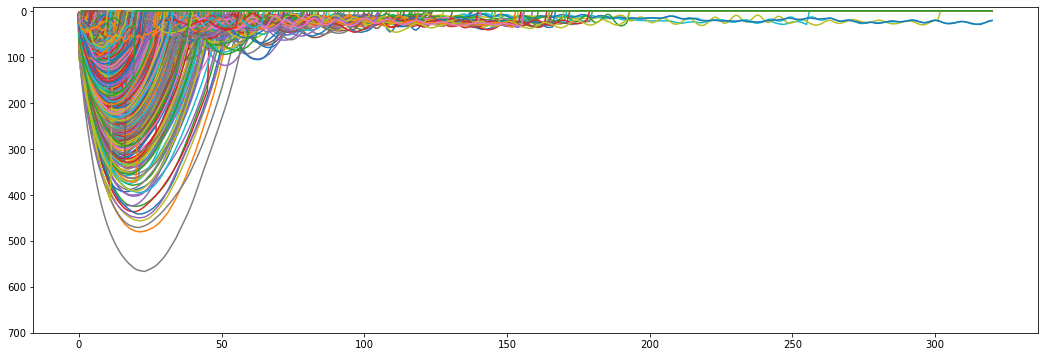

In [28]:
fig = plt.figure(figsize=(18,6))
plt.plot(oscillations.T)
plt.ylim(700,-10)
plt.show()

### Fast Fourier transform

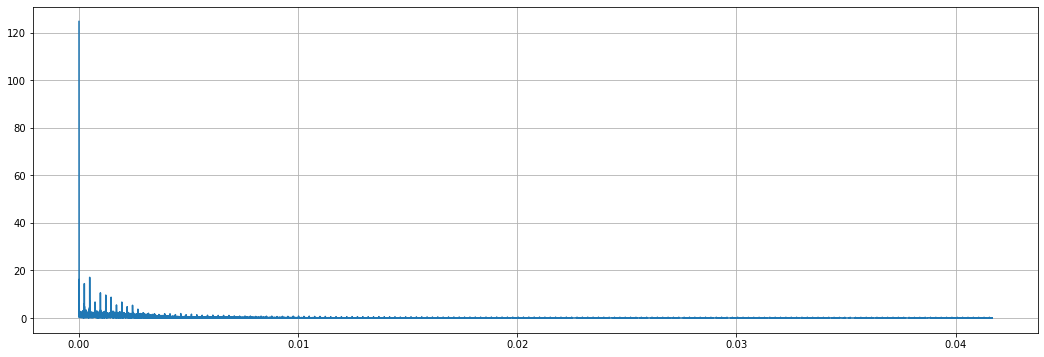

In [26]:
from scipy.fft import fft, fftfreq
# Number of sample points
N = len(timeseries)
# sample spacing
T = 12                         # hours
x = np.linspace(0.0, N*T, N, endpoint=False)
y = timeseries
yf = fft(y)
xf = fftfreq(N, T)[:N//2]

fig = plt.figure(figsize=(18,6))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()